In [21]:
import itertools
import random
import networkx as nx 

def round_robin(n):
  teams = list(range(1, n + 1))
  matches = list(itertools.combinations(teams, 2))

  results = {}
  team_wins = {team: 0 for team in teams}
  team_losses = {team: 0 for team in teams}

  for match in matches:
    team1, team2 = match
    result = random.choice(['1', '2'])

    if result == '1':
      results[match] = f"Team {team1} wins"
      team_wins[team1] += 1
      team_losses[team2] += 1
    else:
      results[match] = f"Team {team2} wins"
      team_wins[team2] += 1
      team_losses[team1] += 1

  print("\nTournament Results:")
  print("{:<12} {:<12} {:<12}".format("Team 1", "Team 2", "Result"))
  print("-"*36)
  for match, result in results.items():
    print("{:<12} {:<12} {:<12}".format(f"Team {match[0]}", f"Team {match[1]}", result))

  # Display the final tally table
  print("\nFinal Tally:")
  print("{:<12} {:<12} {:<12}".format("Team", "Matches Won", "Matches Lost"))
  print("-"*36)
  for team in teams:
    print("{:<12} {:<12} {:<12}".format(f"Team {team}", team_wins[team], team_losses[team]))

    G = nx.DiGraph()

    # Add nodes for teams
    G.add_nodes_from(teams)

    # Add edges based on match results
    for match, result in results.items():
        team1, team2 = match
        if "wins" in result:
            G.add_edge(team1, team2)
        else:
            G.add_edge(team2, team1)

  if hamilton(G):
    print("\nCircle of Parity is possible!")
  else:
      print("\nCircle of Parity is not possible!")
  

def hamilton(G):
    F = [(G,[list(G.nodes())[0]])]
    n = G.number_of_nodes()
    while F:
        graph,path = F.pop()
        confs = []
        neighbors = (node for node in graph.neighbors(path[-1]) 
                     if node != path[-1]) #exclude self loops
        for neighbor in neighbors:
            conf_p = path[:]
            conf_p.append(neighbor)
            conf_g = nx.Graph(graph)
            conf_g.remove_node(path[-1])
            confs.append((conf_g,conf_p))
        for g,p in confs:
            if len(p)==n:
                return p
            else:
                F.append((g,p))
    return None

n = 5
round_robin(n)


Tournament Results:
Team 1       Team 2       Result      
------------------------------------
Team 1       Team 2       Team 1 wins 
Team 1       Team 3       Team 3 wins 
Team 1       Team 4       Team 4 wins 
Team 1       Team 5       Team 5 wins 
Team 2       Team 3       Team 3 wins 
Team 2       Team 4       Team 4 wins 
Team 2       Team 5       Team 5 wins 
Team 3       Team 4       Team 4 wins 
Team 3       Team 5       Team 5 wins 
Team 4       Team 5       Team 5 wins 

Final Tally:
Team         Matches Won  Matches Lost
------------------------------------
Team 1       1            3           
Team 2       0            4           
Team 3       2            2           
Team 4       3            1           
Team 5       4            0           

Circle of Parity is possible!


In [22]:
G = nx.Graph()
edges = [('B', 'C'), ('B', 'E'), ('C', 'D'), ('A', 'D'), ('D', 'J'), ('D', 'E'), ('E', 'F'), ('F', 'J'), ('J', 'A')]
G.add_edges_from(edges)
hamilton(G)

['B', 'E', 'F', 'J', 'A', 'D', 'C']

In [70]:
class Graph(): 
    def __init__(self, vertices): 
        self.graph = [[0 for column in range(vertices)]
                            for row in range(vertices)] 
        self.V = vertices 
 
    ''' Check if this vertex is an adjacent vertex 
        of the previously added vertex and is not 
        included in the path earlier '''
    def isSafe(self, v, pos, path): 
        # Check if current vertex and last vertex 
        # in path are adjacent 
        if self.graph[ path[pos-1] ][v] == 0: 
            return False
 
        # Check if current vertex not already in path 
        for vertex in path: 
            if vertex == v: 
                return False
 
        return True
 
    # A recursive utility function to solve 
    # hamiltonian cycle problem 
    def hamCycleUtil(self, path, pos): 
 
        # base case: if all vertices are 
        # included in the path 
        if pos == self.V: 
            # Last vertex must be adjacent to the 
            # first vertex in path to make a cycle 
            if self.graph[ path[pos-1] ][ path[0] ] == 1: 
                return True
            else: 
                return False
 
        # Try different vertices as a next candidate 
        # in Hamiltonian Cycle. We don't try for 0 as 
        # we included 0 as starting point in hamCycle() 
        for v in range(1,self.V): 
 
            if self.isSafe(v, pos, path) == True: 
 
                path[pos] = v 
 
                if self.hamCycleUtil(path, pos+1) == True: 
                    return True
 
                # Remove current vertex if it doesn't 
                # lead to a solution 
                path[pos] = -1
 
        return False
 
    def hamCycle(self): 
        path = [-1] * self.V 
 
        ''' Let us put vertex 0 as the first vertex 
            in the path. If there is a Hamiltonian Cycle, 
            then the path can be started from any point 
            of the cycle as the graph is undirected '''
        path[0] = 0
 
        if self.hamCycleUtil(path,1) == False: 
            print ("Solution does not exist\n")
            return False
 
        self.printSolution(path) 
        return True
 
    def printSolution(self, path): 
        print ("Circle of Parity exists: Following",
                 "is one COP")
        for vertex in path: 
           print (vertex+1, end=" ")
        print(path[0]+1)
         

In [62]:
import itertools
import random

def simulate_tournament(n):
    teams = list(range(1, n + 1))
    matches = list(itertools.combinations(teams, 2))

    results = []
    team_wins = {team: 0 for team in teams}
    team_losses = {team: 0 for team in teams}

    for match in matches:
        team1, team2 = match
        result = random.choice([team1, team2])  # Select the winner randomly

        # Ensure that the winner (team1 or team2) comes first in the tuple
        if result == team1:
            results.append((team1, team2))
            team_wins[team1] += 1
            team_losses[team2] += 1
        else:
            results.append((team2, team1))
            team_wins[team2] += 1
            team_losses[team1] += 1

    print("\nTournament Results:")
    print("{:<12} {:<12} {:<12}".format("Team 1", "Team 2", "Winner"))
    print("-"*36)
    for match in results:
        print("{:<12} {:<12} {:<12}".format(f"Team {match[0]}", f"Team {match[1]}", f"Team {match[0]}"))
    print("\nFinal Tally:")
    print("{:<12} {:<12} {:<12}".format("Team", "Matches Won", "Matches Lost"))
    print("-"*36)
    for team in teams:
        print("{:<12} {:<12} {:<12}".format(f"Team {team}", team_wins[team], team_losses[team]))

    return results


In [51]:
def make_graph(tournament_results):
    teams = sorted(set(team for match in tournament_results for team in match))
    team_indices = {team: index for index, team in enumerate(teams)}

    # Initialize the adjacency matrix with zeros
    num_teams = len(teams)
    adjacency_matrix = [[0] * num_teams for _ in range(num_teams)]

    # Update the adjacency matrix based on tournament results
    for winner, loser in tournament_results:
        winner_index = team_indices[winner]
        loser_index = team_indices[loser]
        adjacency_matrix[winner_index][loser_index] = 1

    return adjacency_matrix

In [182]:
n_values = []
prob_n = []

In [183]:
has_COP = 0

In [184]:
n = 20
count_max = 100
for _ in range(count_max):
    tournament_results = simulate_tournament(n)
    G = Graph(n)
    G.graph = make_graph(tournament_results)

    if G.hamCycle() == True:
        has_COP += 1

prob = has_COP/count_max
if not n in n_values:
    n_values.append(n)
    prob_n.append(prob)

has_COP = 0



Tournament Results:
Team 1       Team 2       Winner      
------------------------------------
Team 2       Team 1       Team 2      
Team 1       Team 3       Team 1      
Team 4       Team 1       Team 4      
Team 5       Team 1       Team 5      
Team 1       Team 6       Team 1      
Team 7       Team 1       Team 7      
Team 8       Team 1       Team 8      
Team 9       Team 1       Team 9      
Team 10      Team 1       Team 10     
Team 11      Team 1       Team 11     
Team 1       Team 12      Team 1      
Team 1       Team 13      Team 1      
Team 1       Team 14      Team 1      
Team 1       Team 15      Team 1      
Team 16      Team 1       Team 16     
Team 17      Team 1       Team 17     
Team 18      Team 1       Team 18     
Team 19      Team 1       Team 19     
Team 20      Team 1       Team 20     
Team 2       Team 3       Team 2      
Team 2       Team 4       Team 2      
Team 2       Team 5       Team 2      
Team 6       Team 2       Team 6      
Team 2

In [185]:
print(n_values, prob_n)

[20] [1.0]


Text(0.5, 1.0, 'Probability that COP is possible among n teams')

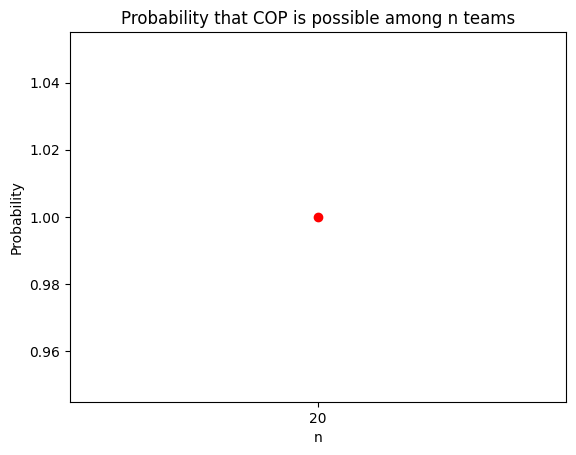

In [172]:
import matplotlib.pyplot as plt 
plt.plot(n_values, prob_n)
plt.xticks(n_values)
plt.scatter(n_values, prob_n, color='red', marker='o')
plt.xlabel('n')
plt.ylabel('Probability')
plt.title('Probability that COP is possible among n teams')

In [186]:
'Case where ABC form loop and DEF form loop'

g1 = Graph(6)
g1.graph = [
    [0,1,0,0,0,0],
    [0,0,1,0,0,0],
    [1,0,0,0,0,0],
    [1,1,1,0,1,0],
    [1,1,1,0,0,1],
    [1,1,1,1,0,0]
]
g1.hamCycle()

Solution does not exist



False